# Moth-Flame Optimization Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Define the main function that optimizes a given function

In [2]:
def MFO(nsa, dim, ub, lb, max_iter, fobj):
# def MFO(nsa, dim, ub, lb, shift, max_iter, fobj):
    ''' Main function
    Parameters :
    - nsa : Number of Search Agents
    - dim : Dimension of Search Space
    - ub : Upper Bound
    - lb : Lower Bound
    - max_iter : Number of Iterations
    - fobj : Objective Function (Fitness Function)
    Returns :
    - bFlameScore : Best Flame Score
    - bFlamePos : Best Flame Position
    - ConvergenceCurve : Evolution of the best Flame Score on every iteration
    '''

    # Initialize the positions of moths
    mothPos = np.random.uniform(low=lb, high=ub, size=(nsa, dim))  # + np.ones((nsa, dim))*shift

    convergenceCurve = np.zeros(shape=(max_iter))

    # print("Optimizing  \"" + fobj.__name__ + "\"")

    for iteration in range(max_iter):  # Main loop
        # Number of flames Eq. (3.14) in the paper
        flameNo = int(np.ceil(nsa-(iteration+1)*((nsa-1)/max_iter)))

        # Check if moths go out of the search space and bring them back
        mothPos = np.clip(mothPos, lb, ub)

        # Calculate the fitness of moths
        mothFit = fobj(mothPos)

        if iteration == 0:
            # Sort the first population of moths
            order = mothFit.argsort(axis=0)
            mothFit = mothFit[order]
            mothPos = mothPos[order, :]

            # Update the flames
            bFlames = np.copy(mothPos)
            bFlamesFit = np.copy(mothFit)

        else:
            # Sort the moths
            doublePop = np.vstack((bFlames, mothPos))
            doubleFit = np.hstack((bFlamesFit, mothFit))

            order = doubleFit.argsort(axis=0)
            doubleFit = doubleFit[order]
            doublePop = doublePop[order, :]

            # Update the flames
            bFlames = doublePop[:nsa, :]
            bFlamesFit = doubleFit[:nsa]

        # Update the position best flame obtained so far
        bFlameScore = bFlamesFit[0]
        bFlamesPos = bFlames[0, :]

        # a linearly dicreases from -1 to -2 to calculate t in Eq. (3.12)
        a = -1 + (iteration+1) * ((-1)/max_iter)

        # D in Eq. (3.13)
        distanceToFlames = np.abs(bFlames - mothPos)

        b = 1
        t = (a-1)*np.random.rand(nsa, dim) + 1
        ''' Update the position of the moth with respect to its corresponding
        flame if the moth position is less than the number of flames
        calculated, otherwise update the position of the moth with respect
        to the last flame '''
        temp1 = bFlames[:flameNo, :]
        temp2 = bFlames[flameNo-1, :]*np.ones(shape=(nsa-flameNo, dim))
        temp2 = np.vstack((temp1, temp2))
        mothPos = distanceToFlames*np.exp(b*t)*np.cos(t*2*np.pi) + temp2

        convergenceCurve[iteration] = bFlameScore

    return bFlameScore, bFlamesPos, convergenceCurve

## Defining the objective function

In [3]:
def F1(x):
    ''' F1 function as defined in the paper for the test '''
    return np.sum(np.power(x, 2), axis=1)


def F2(x):
    ''' F2 function as defined in the paper for the test '''
    return np.sum(np.abs(x), axis=1) + np.prod(np.abs(x), axis=1)


def F3(x):
    ''' F3 function as defined in the paper for the test '''
    o = 0
    for i in range(x.shape[1]):
        o += np.power(np.sum(x[:, :i], axis=1), 2)
    return o


def F4(x):
    ''' F4 function as defined in the paper for the test '''
    return np.max(x, axis=1)


def F5(x):
    ''' F5 function as defined in the paper for the test '''
    o = 0
    for i in range(x.shape[1]-1):
        o += 100*np.power((x[:, i+1] - np.power(x[:, i], 2)), 2) + np.power(x[:, i] - 1, 2)
    return o

def F6(x):
    ''' F6 function as defined in the paper for the test '''
    return np.sum(np.power(x+0.5, 2), axis=1)


def F7(x):
    ''' F7 function as defined in the paper for the test '''
    n = np.arange(1, x.shape[1]+1, 1)
    return np.sum(n*np.power(x, 4), axis=1) + np.random.rand(x.shape[0])

## Testing the optimization function

3.697785493223493e-32 
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]


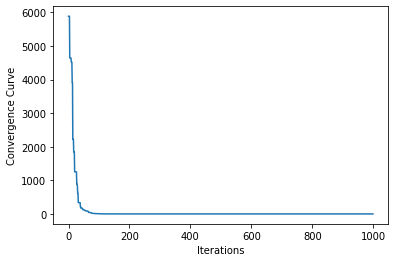

In [4]:
nsa = 30
max_iter = 1000

lb = -100
ub = 100
dim = 10
# shift = -30

bFlameScore, bFlamesPos, convergenceCurve = MFO(
    nsa, dim, ub, lb, max_iter, F6)
print(bFlameScore, '\n', bFlamesPos)
x = np.arange(0, convergenceCurve.shape[0], 1)
plt.plot(x, convergenceCurve)
plt.xlabel('Iterations')
plt.ylabel('Convergence Curve')
plt.show()

## Testing the algorithm a number of times and print the mean and standard deviation of the results

Mean : 6.440309734030916e-32
Standard deviation : 6.432047816325751e-32


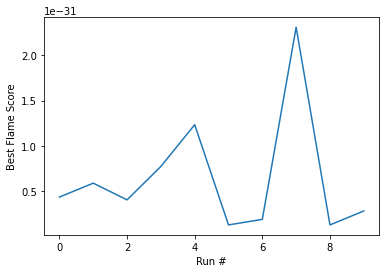

In [5]:
nsa = 30
max_iter = 1000

lb = -100
ub = 100
dim = 10

bFlameScore = np.zeros(10)
for i in range(10):
    bFlameScore[i], _, _ = MFO(nsa, dim, ub, lb, max_iter, F6)

print('Mean :', np.mean(bFlameScore))
print('Standard deviation :', np.std(bFlameScore))

x = np.arange(0, 10, 1)
plt.plot(x, bFlameScore)
plt.xlabel('Run #')
plt.ylabel('Best Flame Score')
plt.show()